In [2]:
from pmdarima import auto_arima
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Risky')
green_patch = mpatches.Patch(color='green', label='Safe')
blue_patch = mpatches.Patch(color='blue', label='price (USDT)')
import seaborn as sns

In [3]:
data = pd.read_csv("dataDebug.csv")
data = data.head(26305)

In [4]:
data

,timestamp,volume,trades,price
0,2020-01-01 00:00:00,1.959652e+06,2811.0,7228.50
1,2020-01-01 00:15:00,1.225410e+06,1897.0,7237.15
2,2020-01-01 00:30:00,1.469870e+06,2163.0,7221.27
3,2020-01-01 00:45:00,1.012436e+06,1466.0,7225.01
4,2020-01-01 01:00:00,1.102373e+06,1985.0,7219.09
...,...,...,...,...
26299,2020-09-30 22:45:00,7.691178e+06,7530.0,10838.88
26300,2020-09-30 23:00:00,6.680208e+06,7136.0,10819.73
26301,2020-09-30 23:15:00,2.736092e+06,3947.0,10814.56
26302,2020-09-30 23:30:00,2.167547e+06,3671.0,10828.42


In [5]:
stats = data['price'].describe()

# Calculando outras estatísticas relevantes
mediana = data['price'].median()
variancia = data['price'].var()  # Variância

# Exibindo tudo junto
print("Estatísticas Descritivas para a feature 'price':\n")
print(stats)
print(f"\nMediana: {mediana:.2f}")

Estatísticas Descritivas para a feature 'price':

count    26304.000000
mean      9175.586029
std       1568.403650
min       3882.220000
25%       8491.655000
50%       9289.410000
75%      10149.637500
max      12421.550000
Name: price, dtype: float64

Mediana: 9289.41


In [6]:
data['price'].std()

1568.4036497761313

<Axes: ylabel='price'>

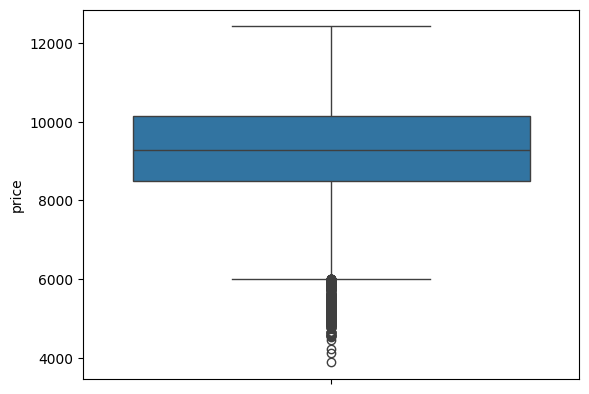

In [7]:
sns.boxplot(data['price'])

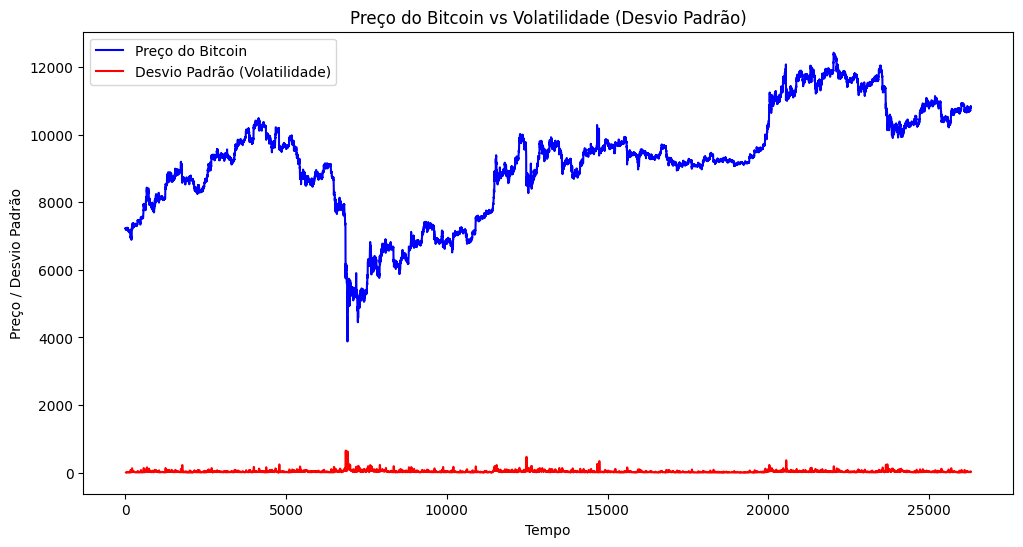

In [13]:
# Supondo que seu DataFrame já esteja carregado como df e a coluna de preço seja 'close'
data['std_movel'] = data['price'].rolling(window=20).std()  # Desvio padrão móvel (janela de 20 pontos)

# Plotando o preço e o desvio padrão
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['price'], label='Preço do Bitcoin', color='blue')
plt.plot(data.index, data['std_movel'], label='Desvio Padrão (Volatilidade)', color='red')
plt.xlabel('Tempo')
plt.ylabel('Preço / Desvio Padrão')
plt.title('Preço do Bitcoin vs Volatilidade (Desvio Padrão)')
plt.legend()
plt.show()

In [14]:
# Calculando o desvio padrão dentro de cada janela de 24 amostras
data['std_movel'] = data['price'].rolling(window=24).std()

# Calculando a média de todos os desvios padrões calculados
media_de_todos_desvios = data['std_movel'].mean()

print(f"Média de todos os desvios padrões: {media_de_todos_desvios}")

Média de todos os desvios padrões: 43.11365848290146
